<font color = red><font size = 5>Importing Libraries</font>

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import sys
import types
import os

<font color = red><font size = 4> Loading Dataset </font>

In [2]:
os.chdir(r"C:\Users\Bushra Ansari\Desktop\LMS DATASET\Time Series")

furniture = pd.read_csv("Super_Store.csv", encoding='cp1252')
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
# Checking structure of the data
furniture.shape

(2121, 21)

In [4]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

<font color = red><font size = 4> Statistical Summary</font>

In [7]:
furniture.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,2121.0,5041.643564,2885.740258,1.0000,2568.000,5145.0000,7534.0000,9991.000
Postal Code,2121.0,55726.556341,32261.888225,1040.0000,22801.000,60505.0000,90032.0000,99301.000
Sales,2121.0,349.834887,503.179145,1.8920,47.040,182.2200,435.1680,4416.174
Quantity,2121.0,3.785007,2.251620,1.0000,2.000,3.0000,5.0000,14.000
Discount,2121.0,0.173923,0.181547,0.0000,0.000,0.2000,0.3000,0.700
Profit,2121.0,8.699327,136.049246,-1862.3124,-12.849,7.7748,33.7266,1013.127


<font color = red><font size = 4> Checking Data Type and Missing Values </font>

In [6]:
# summary of the data 
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

<font color = red><font size = 4>Checking the furniture sales time stamp</font>

In [8]:
furniture['Order Date'].min(), furniture['Order Date'].max()

('1/1/2017', '9/9/2017')

In [9]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [10]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 845 to 964
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  2121 non-null   object 
 1   Sales       2121 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.7+ KB


In [11]:
furniture["Order Date"].value_counts()

9/5/2016      10
10/30/2017     9
12/1/2016      9
11/19/2017     9
12/25/2016     9
              ..
6/17/2017      1
2/3/2017       1
6/17/2014      1
2/4/2016       1
10/23/2016     1
Name: Order Date, Length: 889, dtype: int64

In [12]:
furniture.head()

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940


<font color = red><font size = 3>Aggregate sales data by date</font>

In [13]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,1/1/2017,975.4900
1,1/10/2014,51.9400
2,1/10/2015,1018.1040
3,1/10/2016,104.7700
4,1/11/2014,9.9400
...,...,...
884,9/8/2016,3374.9816
885,9/8/2017,1000.2390
886,9/9/2014,864.0240
887,9/9/2016,15.0080


Indexing with the Time Series Data

In [14]:
furniture["Order Date"].value_counts()

1/1/2017      1
6/16/2014     1
6/11/2017     1
6/12/2015     1
6/12/2016     1
             ..
12/28/2017    1
12/29/2014    1
12/29/2016    1
12/29/2017    1
9/9/2017      1
Name: Order Date, Length: 889, dtype: int64

In [15]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.sort_values(by="Order Date", inplace=True)

In [16]:
furniture["Order Date"].min() 

Timestamp('2014-01-06 00:00:00')

In [17]:
furniture["Order Date"].max()

Timestamp('2017-12-30 00:00:00')

In [18]:
furniture

,Order Date,Sales
49,2014-01-06,2573.8200
50,2014-01-07,76.7280
1,2014-01-10,51.9400
4,2014-01-11,9.9400
7,2014-01-13,879.9390
...,...,...
290,2017-12-24,1393.4940
293,2017-12-25,832.4540
300,2017-12-28,551.2568
303,2017-12-29,2330.7180


In [19]:
furniture.set_index('Order Date', inplace=True)
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Resampling the datetime data. Here we use the start of each month as the timestamp and take the average daily sales value for a particular month since working with the current datetime data becomes tricky

In [20]:
furniture.to_csv("df.csv")

<AxesSubplot:xlabel='Order Date'>

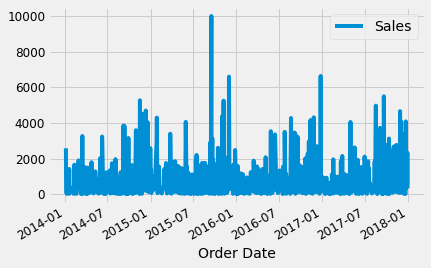

In [22]:
furniture.plot()

In [23]:
y = furniture['Sales'].resample('MS').mean() 

In [24]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [25]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

<font color = red><font size = 5>Visualizing Furniture Sales Time Series Data</font>

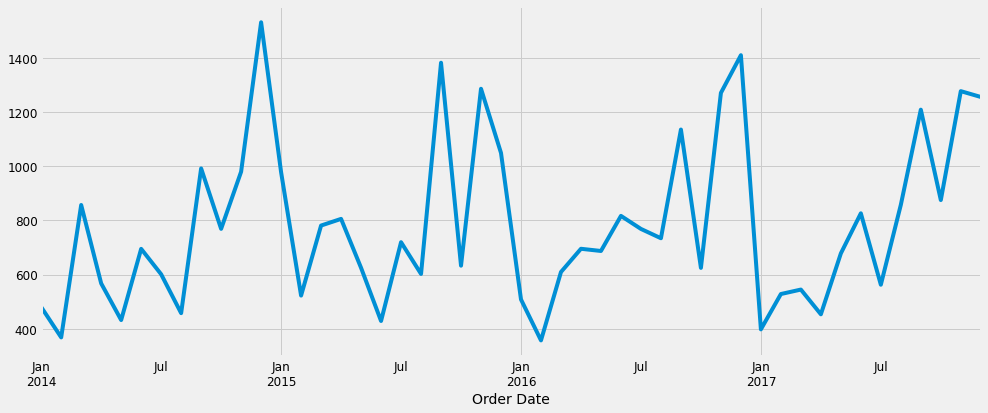

In [27]:
y.plot(figsize=(15, 6))
plt.show()

The plot clearly indicates that the time series has seasonality pattern.The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year

In [28]:
train = y[:'2017-06-01']
test = y['2017-07-01':]

<font color = red><font size = 5> Single Exponential Smoothing </font>

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [30]:
# our guessed parameters
alpha = 0.4
beta = 0.2
gamma = 0.01

# initialise model
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

In [31]:
fcast = ets_fit.forecast(steps=12)
fcast

2017-07-01     738.154940
2017-08-01     672.890623
2017-09-01    1289.748476
2017-10-01     760.326303
2017-11-01    1383.208158
2017-12-01    1579.578021
2018-01-01     752.196023
2018-02-01     653.213546
2018-03-01     955.063330
2018-04-01     865.383391
2018-05-01     816.498568
2018-06-01     962.600956
Freq: MS, dtype: float64

In [32]:
test

Order Date
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [33]:
print("MSE: ", np.mean((test-fcast)**2))
print("MAE: ",np.mean(np.abs((test-fcast))))

MSE:  33392.697911347735
MAE:  164.09456901504458


In [34]:
def ETS_auto(train, test,alpha=[None], beta=[None], gamma=[None]):
    best_alpha=0
    best_beta=0
    best_gamma=0
    best_mae=None
    for i in alpha:
        for j in beta:
            for k in gamma:  
                ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
                ets_fit = ets_model.fit(smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k)
                fcast = ets_fit.forecast(steps=6)
                mae=np.mean(np.abs((test-fcast)))
                if best_mae is None or best_mae >mae:
                    best_mae=mae
                    best_alpha=i
                    best_beta=j
                    best_gamma=k
    best_params={"alpha":i, "beta":j, "gamma":k,"mae":best_mae}
    return best_params       

In [35]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], phi=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    '''The auto_hwm (short for auto holt winters model) function to search for the best possible parameter
        combination for the Exponential Smoothing model i.e. smoothing level, smoothing slope, 
        smoothing seasonal and damping slope based on mean absolute error.

        ****Paramters****

        timeseries: array-like

                  Time-Series

        val_split_date: str

                  The datetime to split the time-series for validation

        alpha: list of floats (optional)

                  The list of alpha values for the simple exponential smoothing parameter

        beta: list of floats (optional)

                  The list of beta values for the Holt’s trend method parameter

        gamma: list of floats (optional)

                  The list of gamma values for the holt winters seasonal method parameter

        phi: list of floats (optional)

                  The list of phi values for the damped method parameter

        trend: {“add”, “mul”, “additive”, “multiplicative”, None} (optional)

                  Type of trend component.

        seasonal: {“add”, “mul”, “additive”, “multiplicative”, None} (optional)
                  
                  Type of seasonal component.

        periods: int (optional)
                  
                  The number of periods in a complete seasonal cycle

        ****Returns****

        best_params: dict

                  The values of alpha, beta, gamma and phi for which the 
                  validation data (val_split_date) gives the least mean absolute error
    '''

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma) * len(phi), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:
                for p in phi:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g, 'phi': p})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g, damping_slope=p)
                    f_cast = model.predict(model.params, start=actual.index[0])
                    score = np.float64(mean_absolute_error(actual, f_cast)).mean()

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'phi': p, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])


In [36]:
auto_hwm(y, val_split_date = '2017-06-01', 
         alpha = np.linspace(0,0.5,5), 
         beta = np.linspace(0,0.5,5), 
         gamma = np.linspace(0,0.5,5), 
         trend='mul', 
         seasonal='mul', 
         periods=12, verbose=True)

Evaluating Exponential Smoothing model for 125 fits

Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.0, 'phi': None}


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:92

Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.5, 'phi': None}
Checking for {'alp

C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:92

Checking for {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.0, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.0, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.0, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.0, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.0, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.125, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.125, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.125, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.125, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.125, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.25, 'gamma': 0.0, 'phi': None}
Ch

{'alpha': 0.125,
 'beta': 0.375,
 'gamma': 0.0,
 'phi': None,
 'mae': 97.60098136939553}

In [40]:
# best parameters
alpha = 0.125
beta = 0.375
gamma = 0

# initialise model
ets_model = ExponentialSmoothing(y, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

In [41]:
fcast = ets_fit.forecast(steps=12)

In [42]:
fcast

2018-01-01     642.646690
2018-02-01     519.518189
2018-03-01     790.917233
2018-04-01     713.051150
2018-05-01     669.063101
2018-06-01     949.837041
2018-07-01     766.281724
2018-08-01     789.704862
2018-09-01    1459.785070
2018-10-01     887.447178
2018-11-01    1569.555167
2018-12-01    1640.334280
Freq: MS, dtype: float64

<font color = red><font size = 5>Checking Stationarity </font>

In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
adfuller(y)

(-5.191070187339274,
 9.1687566556655e-06,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 521.9616303121272)

In [45]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.191070
p-value: 0.000009
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


We can see that our statistic value of -5.191070 is less than the value of -3.621 at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The p-value is 0.000009, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggests the time series does not have a unit root, meaning it is stationary.

<font color = red><font size = 5>Decomposing : </font></br>
<font color = black><font size = 3>Decomposing the time series into three distinct components: trend, seasonality, and noise.</font>

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y, model='multiplicative',  two_sided=False, extrapolate_trend=4)
decomposition

Order Date
2014-01-01    1.002710
2014-02-01    1.019019
2014-03-01    1.449618
2014-04-01    1.059923
2014-05-01    0.836962
2014-06-01    1.152516
2014-07-01    1.035863
2014-08-01    0.784992
2014-09-01    0.950487
2014-10-01    1.177302
2014-11-01    0.904377
2014-12-01    1.269304
2015-01-01    1.664691
2015-02-01    1.160107
2015-03-01    1.075209
2015-04-01    1.237542
2015-05-01    0.991407
2015-06-01    0.594809
2015-07-01    1.064848
2015-08-01    0.890869
2015-09-01    1.130075
2015-10-01    0.830289
2015-11-01    1.025524
2015-12-01    0.769986
2016-01-01    0.810682
2016-02-01    0.796413
2016-03-01    0.862330
2016-04-01    1.124647
2016-05-01    1.177519
2016-06-01    1.189932
2016-07-01    1.156875
2016-08-01    1.109079
2016-09-01    0.980359
2016-10-01    0.888704
2016-11-01    1.109356
2016-12-01    1.102843
2017-01-01    0.635298
2017-02-01    1.137841
2017-03-01    0.726224
2017-04-01    0.691269
2017-05-01    1.107494
2017-06-01    1.176125
2017-07-01    0.855795


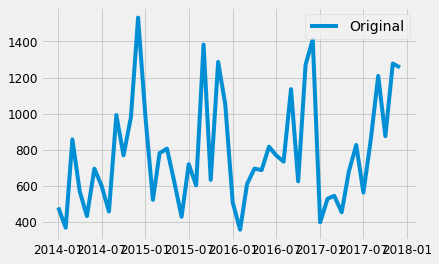

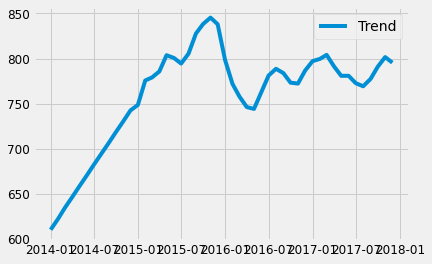

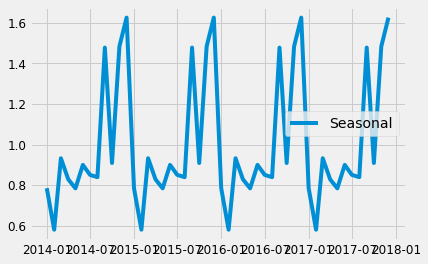

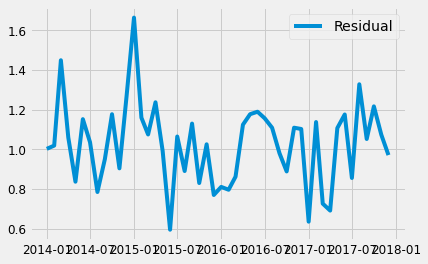

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y, model='multiplicative',  two_sided=False, extrapolate_trend=4)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

By visualizing the decomposed components of the original time series we can say that the sales of furniture is unstable, along with its obvious seasonality.

<font color = red><font size = 5>Forecasting</font>

<font color = red><font size = 4>Time Series Forecasting using ARIMA</font></br>
<font color = black><font size = 2>We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data</font>

In [48]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


<font color = red><font size = 4>Parameter Selection </font></br>
<font color = black><font size = 2>We use “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [49]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1648.150812281747
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:354.7862732407005
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920111
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793726
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:146.88834672464736
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:336.9536604856288
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:149.84561033292687
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1232.1145479800155
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:309.56039684622556
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.00471991163414
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280302578
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:148.83996705488377
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:162.12029487165506
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:151.35761675098883
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:319.96929434508735
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:656.4514563514363
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:307.8981846483094
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:159.5144730671919


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:161.29079492851716
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:150.77405830117536
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758097


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2687.5782590646995
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:323.4436688558082
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809164
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.62613896732864
ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:135.88293598954814
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:324.4135789668787
ARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:136.53719210574732
ARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:8.0


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.6410563895291


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2179.240855447669


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:299.14201172109847
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946869
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.87255765683983
ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:137.6340991459675
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:163.9883442810855
ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:137.70652786305723
ARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:321.9645277042794


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:685.6923187744853


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:296.98268805716714
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:160.85410049250248
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:162.63152998646927


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:134.83938147093335
ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:695.9854310935201


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:2507.8854488892302
ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:311.1637215585529
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:455.2093474618761
ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:279.996668914375


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:121.51339160320873
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:311.8417385725353
ARIMA(0, 0, 2)x(0, 2, 1, 12)12 - AIC:121.64768702817248
ARIMA(0, 0, 2)x(0, 2, 2, 12)12 - AIC:10.0


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:501.0322027576551
ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:2126.3261741087704


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:286.18469116685327
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:321.88005844738836
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:281.78833393067373


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:122.1881388550083
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:164.18237603755696
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:123.961439474939
ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:323.5822759544452


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:695.9610325586198


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:285.892797463011
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:163.57819530872666
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:164.35074076256652


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:122.59527340704315
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1458.890677322674
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:315.54758780433906
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6378567211039
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.96712281679555
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:139.90087903199907
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:334.97781229775893
ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:139.41258905664606
ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1387.4320077629673
ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:306.3042741397358
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.91132001514467


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:141.94935419827473
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:152.42852106596328


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 2, 1, 12)12 - AIC:141.41111741671125
ARIMA(0, 1, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:317.69402237661177
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:932.8180348619751


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:307.0515052415531
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:153.33829187964875
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:155.0384623709436


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:143.81214702354484
ARIMA(0, 1, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817387
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2482.6024679943994
ARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:295.4984100653544
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.87055484827516
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806233411625
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:124.25148374266898
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:317.1957697239934
ARIMA(0, 1, 1)x(0, 2, 1, 12)12 - AIC:123.18774195984761
ARIMA(0, 1, 1)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442629


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1634.8090843898367


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:289.02076553258684
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684174756
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621461245
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:126.07741157123083
ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:154.4175410259362
ARIMA(0, 1, 1)x(1, 2, 1, 12)12 - AIC:125.15199080628011
ARIMA(0, 1, 1)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:311.85906742412055


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:940.5190811202177
ARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:287.508895419754
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:149.57227369321998
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:151.43439374516626


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:128.07526329150824
ARIMA(0, 1, 1)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:634.8844283595557
ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:2491.9450426834446


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:283.60087644656045
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:447.5857396952861
ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:269.83259451638094
ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:109.97825467856873
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:305.03445359431646
ARIMA(0, 1, 2)x(0, 2, 1, 12)12 - AIC:112.17910628360897
ARIMA(0, 1, 2)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:487.49869126828924
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:2402.3860192672846


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:276.4075358738751
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:310.7338930728119
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:271.79356960698556


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:112.97468410941119
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:154.69701034326533


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:113.38656635695176
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:313.482384717017


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:818.9986303517778
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:275.74365019057177
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:151.1905645906412


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:153.3460237910153


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:113.92632097860769
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:710.1125557024402


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1215.620388711466
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:319.131703209972
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:509.89680952051333
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:315.58973980075683
ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:128.8600146180435
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:342.9544197962702
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:127.63190004588702
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:520.887712617653


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:1262.2839497924422
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:311.3535200783278
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:331.2504844685115
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:317.5552326946505
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:130.8845696163819
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:141.68398673297636


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:129.5207470616439
ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:327.5955004314904


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:959.988214524675
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:312.2057126442319
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:143.52744982862265
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:145.0966855017645


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:132.67725613806724
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:652.8685965207345


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:1097.584051695736
ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:288.6859049830033
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:463.034654427939
ARIMA(0, 2, 1)x(0, 1, 1, 12)12 - AIC:282.24604671049957
ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:114.86320979566533
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:310.3285223971802
ARIMA(0, 2, 1)x(0, 2, 1, 12)12 - AIC:112.08533450101373
ARIMA(0, 2, 1)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:489.9458560734445


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:1175.957600113636


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(1, 0, 2, 12)12 - AIC:284.90865644320036
ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:310.9864728692646
ARIMA(0, 2, 1)x(1, 1, 1, 12)12 - AIC:284.2354053255341


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(1, 1, 2, 12)12 - AIC:116.63494303369728
ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:143.27935910507574
ARIMA(0, 2, 1)x(1, 2, 1, 12)12 - AIC:116.3462212351192
ARIMA(0, 2, 1)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:310.50562447090994


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:892.3143608929578
ARIMA(0, 2, 1)x(2, 0, 2, 12)12 - AIC:284.4723865209724
ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:142.29873089299008
ARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:146.62326377538022


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(2, 1, 2, 12)12 - AIC:117.89102853207044
ARIMA(0, 2, 1)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:628.8859101986712
ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:1181.4764758828185


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:273.6722936404385
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:440.1803441492682
ARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC:262.06304384742543


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:99.04347047404113
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:294.74667970544783
ARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC:96.60020987364369
ARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:482.9003702784564


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:1358.4145441821925


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:269.3540402750768
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:305.8984452507645


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:263.5280180410615


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:101.05164993364158
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:145.59346406213456


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:98.90915447788953
ARIMA(0, 2, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:306.3280772163003


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:950.341501544316


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:269.333599012312


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:140.8637766259286


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:143.11164750422844


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:107.09358286260722
ARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:14.0


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1556.0399256830576
ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:329.8577321597476
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.2077675160968
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:148.46829552146298
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:338.2224810186686
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:151.84507831803262
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679352115


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1022.5669273068213


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:311.92092676270164
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.466467508459
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.58426921437973
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:150.46626820645488
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:151.388203675642


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:153.29394443542762
ARIMA(1, 0, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:306.463949684273


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:709.4762136922784


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:309.8109407049156
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:148.47129149084705
ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:150.47090738532597
ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:152.46207035734275
ARIMA(1, 0, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442185991


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2107.931167461749
ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:311.068230753554
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195814962
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.342219396591
ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:137.44660510144524
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:326.36049011937166
ARIMA(1, 0, 1)x(0, 2, 1, 12)12 - AIC:140.00660547902197
ARIMA(1, 0, 1)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238768034
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2177.178849906198


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:301.02284834763276
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.01560021768887
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.751318812428
ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:139.5995560359549
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:153.66789029612298
ARIMA(1, 0, 1)x(1, 2, 1, 12)12 - AIC:138.87977123942528
ARIMA(1, 0, 1)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:309.7096567887332


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:780.7152241520654


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:298.7790915062413
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:148.64415332320863
ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:152.4450399560287


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:136.30013969828983
ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:652.5371565502678
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:2549.6889162297343


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:298.3772820432883
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:454.5162597159926
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:277.758892759503


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:122.83844516128259
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:311.9686688259668


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:120.0121926369795
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:483.9435796166859
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:2128.5392633258493


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:290.9909360603308
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:305.8460722900972
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:279.7400732255015


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:124.37977814047629


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:153.2389210962732


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:120.16199793037516
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:309.0066792975315


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:657.8412969051492


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:286.3200327579395
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:150.64208002440054


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:152.69542426100077


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:126.97579285170225
ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1390.4391218604178
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:313.8089614374279
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.20034222811347
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.21306116190965
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:141.07356676677716
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:332.3956597623955
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:140.96246737935283
ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036587849226


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1055.1084773459788


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:305.35633160177446
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345405
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.3264992512191
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:143.05792041337543
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:140.97940432821568
ARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:142.44494457930153
ARIMA(1, 1, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:301.76885242895526
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:873.211640231392
ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:305.5489372378141
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:141.03361172504108
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:142.9332030493112
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:144.93321219354945
ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835871


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2447.874000586573
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:296.29257055433135
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687610352
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.3873006939387
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:126.23923691794207
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:317.99077543475903
ARIMA(1, 1, 1)x(0, 2, 1, 12)12 - AIC:127.02337312432402
ARIMA(1, 1, 1)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.5250354660882


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2181.1468154899794
ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:289.5032098686416
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395435413
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.3661017054992
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:128.07390204061147
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:139.8988438957388
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:126.41574491243115
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:304.8135321454533


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:894.7600522766506


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:289.1754752690172
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:138.337143651791


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:140.32911071584297


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:130.25013647041573
ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:636.8790377891872
ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:2036.1830126853652
ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:280.94583113060713
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:449.47888589754507
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:270.580437035684
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:110.6498912186672
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:305.71513971589866


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:114.87726256386549
ARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:471.0555765030862
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:1807.8078989497008


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:278.2302792953689


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:299.78468999949183


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:273.20151874917576


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:110.86763018497079
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:142.46380187455668


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:112.19710083308838
ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:302.217768102773
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:930.3025745936457


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:278.51939410940963


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:140.86254622266603


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:142.22894134597897


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:112.86550452774489
ARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:691.2298181871188
ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:1369.123252572813
ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:314.20978872994607
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:487.72549582761314
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:301.91514986776707
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:130.77323947190112
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:326.7564415658333
ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:129.58856438121228
ARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:485.7746885900553


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:1349.0842887379288
ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:303.73329930675254
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:302.055214322534
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:302.474547061197


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:132.8774808783453
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:129.59004245503502
ARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:131.5885184266857
ARIMA(1, 2, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:303.8385216914169


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:981.4297466544683
ARIMA(1, 2, 0)x(2, 0, 2, 12)12 - AIC:303.8302914129712
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:130.86502683952588


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:132.55791418171452
ARIMA(1, 2, 0)x(2, 1, 2, 12)12 - AIC:134.60016399019844
ARIMA(1, 2, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:647.5183048787485


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:2505.8508384187435
ARIMA(1, 2, 1)x(0, 0, 2, 12)12 - AIC:288.00885490336304
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:455.9868411970376
ARIMA(1, 2, 1)x(0, 1, 1, 12)12 - AIC:278.8955672587277
ARIMA(1, 2, 1)x(0, 1, 2, 12)12 - AIC:116.1394829819968
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:308.33975356025644
ARIMA(1, 2, 1)x(0, 2, 1, 12)12 - AIC:116.30507432550942
ARIMA(1, 2, 1)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:470.83502628215797


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:296.0416775181663


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:284.0801063024895
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:293.09174468289194
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:280.8604639140697


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:117.96621434480807


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:128.4645617815375


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:110.5030708376388
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:293.7678013029156


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:1000.6754362566604
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:284.1402254200651
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:130.67250513585373


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:132.1495866731488


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:120.20552515298476
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:14.0


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:629.3897471140089
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:1567.387047803139


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:274.81053935427326
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:442.0816341806546


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:263.8094449768508


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:99.379023716568
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:294.56278264590026
ARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:107.5291147824958
ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:470.5931669609878


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:2117.209199989885


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:270.91991376178464
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:293.3465954552888
ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:265.43062100391114


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:103.35798843542204
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:127.95948031354723


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:103.90625019683812
ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:294.0029141373477
ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:750.1394067100956


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:271.78820411910056
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:129.61643100444883


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:129.18025045048455


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:104.42262694635858
ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:673.0244705850719


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:1523.8704385212548
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:329.6445545186863
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:468.31523432718774
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:305.76047109182866
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:150.46805218439357
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:326.1432862885688
ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:153.8278167552646
ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:469.60455394734925


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:1027.4846624787135


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:312.85456845439614
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:293.5694644840524
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:295.36059734624536


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:152.46824146982684
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:134.47815433027313
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:136.13115318274572
ARIMA(2, 0, 0)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:295.528190972671
ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:692.9901383028791


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:299.1945283781074
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:136.04020418829904


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:137.5563817003544


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:136.90541499551875
ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7944839756194


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:2422.6352988853014


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:312.7435321431298
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:469.8069210954454
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:295.31054163462653


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:133.76789268047645
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:326.6148901285315
ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:136.41927809982562
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:471.15581793164097


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:2095.732829709774


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:301.76183212682514
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:294.1493643320073


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:292.8820896938415


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:137.00627323030233
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:136.47829623064757


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:142.62356340959474
ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:295.9333701064104


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:690.4424037590726


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:299.95669092522127


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:133.59272996266023


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:140.15543688047


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:144.10015448105173
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:653.6818630914654
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:2352.882403139406


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:296.4983008461848


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:453.64031570093783


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:276.3382324925825


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:122.4595847619986
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:314.45821367123284


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:125.38219435892817
ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:471.84787708638123


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:1772.4040563098538


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:292.9689488183577


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:288.56154663505913


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:280.18486511014066


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:126.90414166262187
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:135.25203411519868


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:126.06942872722558
ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:16.0


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:292.2915106024848


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:806.9495349546406


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:290.3322068127567


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:133.45967024512046


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:134.80827277530977


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:127.54046391583849
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:18.0
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:651.8913365664915


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1385.7441390144297
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:309.75357364468647
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:464.89194824201576
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:300.27072677062546
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:140.40064933253822
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:318.6712257569023
ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:142.91921627436597
ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:461.97779691394624


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:991.120851550729
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:305.5688551731612
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:288.3935650417792
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:289.32382951400075


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:142.36871754853354
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:127.60471418792642


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:129.25274840240394
ARIMA(2, 1, 0)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:288.759869837132


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:814.4408140960622


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:292.09976956225523
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:126.8691050070545
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:128.32471504128964
ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:130.1752199110007
ARIMA(2, 1, 0)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:653.7027592627578


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:2548.8850559020234
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:299.20765200729505
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:461.57371821054335
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:283.26647176282484
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:126.19789518420893
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:319.47517657370423
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:124.42338571101651
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:457.9119800485955


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1978.5220803072082


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:291.23847247832884
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:287.8557403107638
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:285.2604010915382


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:128.33445294253633


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:124.67848246488258


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:125.85110369929482
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:287.84509317704567


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:888.2309746090901
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:294.0826289614667
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:126.32876516339601


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:128.11506298505702


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:130.39075687487878
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:642.1210464616584


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:1657.8793703130677
ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:282.87665525811303
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:450.0711888874829


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:269.7615604876196
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:112.63703425476113
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:305.94451673248744


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:106.13161189192587
ARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:459.0451074094175


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:2496.4362001443415


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:278.60465598517493


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:287.5622596045214
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:275.0028456537291


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:112.9081646495485


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:127.33996556930671


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:120.3558013709521
ARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:288.5720385704319


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:836.9046473649208


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:280.4695920849184


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:127.9117365475292


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:133.41567301632463


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:115.95592773161286
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:656.929182124119


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:1352.1788715166097
ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:303.76095384822503
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:467.74561119176593
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:296.6216264788032
ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:131.131093327716
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:311.69952051933996
ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:130.61436689460834
ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:464.7608850390007
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:1341.4163973844609


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:301.21964304970464
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:286.0955354148089
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:285.3279206191251
ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:133.1793427461771
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:117.90430574037242


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(1, 2, 1, 12)12 - AIC:118.99302082874159
ARIMA(2, 2, 0)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:283.15554858394097


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:827.3235695606428
ARIMA(2, 2, 0)x(2, 0, 2, 12)12 - AIC:286.8315672704731
ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:117.49144309451503
ARIMA(2, 2, 0)x(2, 1, 1, 12)12 - AIC:118.96814924502648
ARIMA(2, 2, 0)x(2, 1, 2, 12)12 - AIC:120.29539957509775
ARIMA(2, 2, 0)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 0)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:643.7507440372161
ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:938.4773672181863


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:286.0771901519212
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:457.7096702182585
ARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:278.9052116511873
ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:115.89357127292119
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:309.38538551821745
ARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:118.6816456797022
ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:455.0965992766254


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:869.6286394204394


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:283.5169008565155
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:279.4519907926499
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:280.8718624811278


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:117.81302182915437
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:117.3599606631947


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:122.55206006405065
ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:279.4551139175853


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:677.2114440352989


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:282.81258837565446


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:116.2659746443615


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:118.18255776189744


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:119.86294372726363
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:631.2678875790313


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:716.6387377805187


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 0, 2, 12)12 - AIC:273.3183942317153
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:445.24599241225997


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 1, 1, 12)12 - AIC:264.3515246083608


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:103.44933790576347
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:296.46503563102317


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 2, 1, 12)12 - AIC:99.46259641037096
ARIMA(2, 2, 2)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:452.31401808412113


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:1268.047043388323


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 0, 2, 12)12 - AIC:273.4390448794567


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:281.4449947677225


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:267.16907597444174


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:104.97526362272887


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:115.7951491460023


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:109.14934112750106
ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:281.3174676910957


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:870.5297084627946


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:273.49239446663086


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:119.41112447967699


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:120.64897154991911


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:111.56166086732219
ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:18.0


<font color = red><font size = 4>Fitting the ARIMA model

In [50]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6705      2.729     -0.246      0.806      -6.020       4.679
ma.L1         -2.7080      0.223    -12.161      0.000      -3.144      -2.272
ma.S.L12   -1.091e+14    5.4e-05  -2.02e+18      0.000   -1.09e+14   -1.09e+14
sigma2      1.129e+05   3.83e+04      2.947      0.003    3.78e+04    1.88e+05


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<font color = red><font size = 4>Running model diagnostiscs to check any unusual behaviour

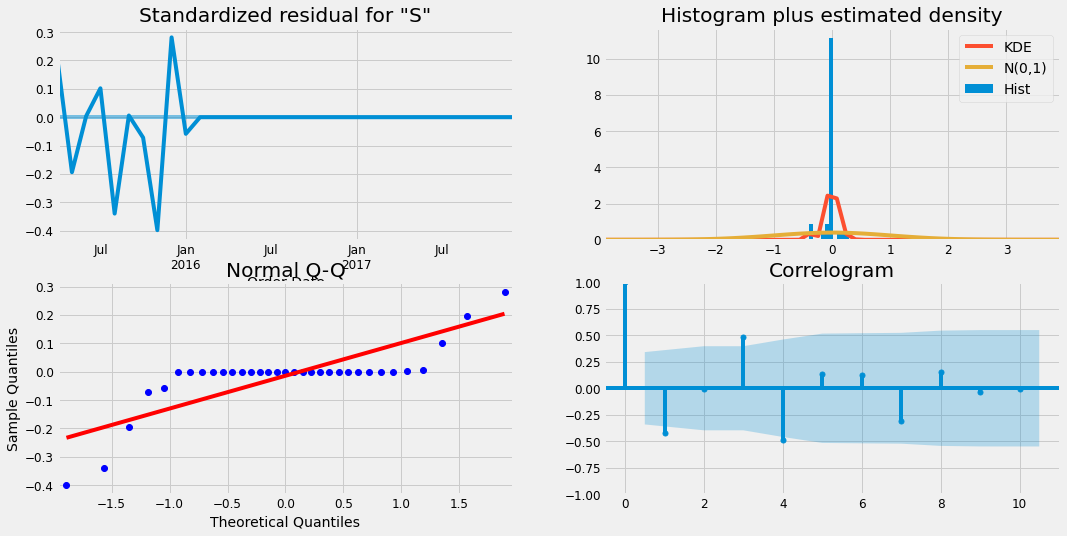

In [51]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Standardized Residual : The residuals scatters around a mean near zero, as they should, with no obvious trends or patterns indicating misspecification.

Histogram plus estimated density: The data distribution is nearly normal.

Normal Q-Q : The plots show sample quantiles versus theoretical quantiles. Those are the quantiles from the standard Normal distribution with mean 0 and standard deviation 1. The points seem to fall about a straight line. This graphs to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential

Correlogram : There is no evidence of autocorrelation outside of the Bartlett two-standard-error bands for white noise, given by the blue lines.

The model diagnostics indicates that the model residuals are near normally distributed

<font color = red><font size = 4>Validating Forecasts</font></br>
<font color = black><font size = 2>We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts

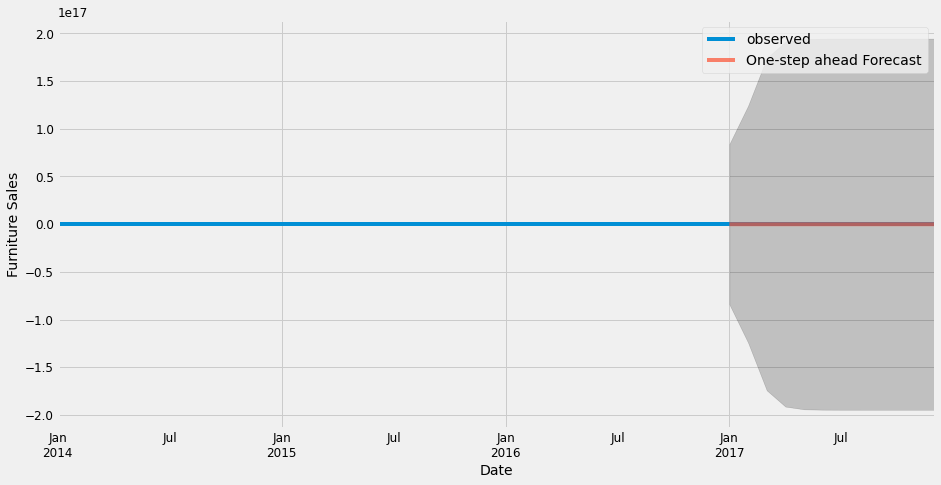

In [52]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The above plot indicates the observed value and the rolling forecast predications (A rolling forecast is an add/drop process for predicting the future over a set period of time). The predicated values align well with the true values.

<font color = red><font size = 4>Calculating RMSE

In [53]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 337004896383.58


RMSE tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales.

<font color = red><font size = 4>Visualizing the Forecast 

             lower Sales   upper Sales
2018-01-01 -1.945637e+17  1.945637e+17
2018-02-01 -1.947173e+17  1.947173e+17
2018-03-01 -2.329662e+17  2.329662e+17
2018-04-01 -2.358802e+17  2.358802e+17
2018-05-01 -2.554023e+17  2.554023e+17
2018-06-01 -2.616974e+17  2.616974e+17
2018-07-01 -2.749898e+17  2.749898e+17
2018-08-01 -2.828193e+17  2.828193e+17
2018-09-01 -2.934865e+17  2.934865e+17
2018-10-01 -3.017529e+17  3.017529e+17
2018-11-01 -3.110996e+17  3.110996e+17
2018-12-01 -3.193162e+17  3.193162e+17
2019-01-01 -3.278829e+17  3.278829e+17


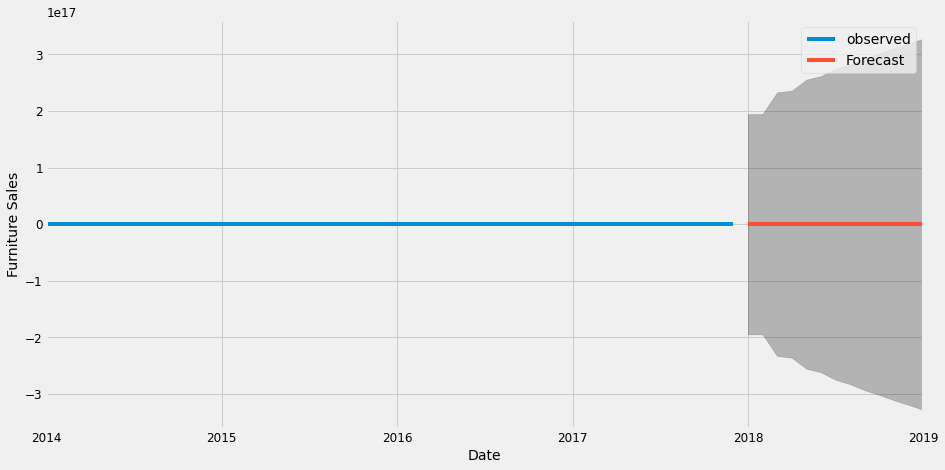

In [54]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()

<font color = red><font size = 5>Conclusion

We observe that sales of furniture produces seasonal pattern. Early of the year is the off season for furniture sales in the superstore. The sales for furniture increases linearly over time in a year.